Loading the libraries

In [ ]:
import numpy as np
import pandas as pd
import sys

Loading the libraries required for Data Visualization

In [ ]:
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio

Setting visualization parameters

In [ ]:
# visualization settings
plt.style.use('seaborn')
plt.rcParams['figure.facecolor'] = 'white'
pio.renderers.default = 'colab'

<ipython-input-3-d1c62471fdf5>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Loading the Prophet library

In [ ]:
# prophet
from prophet.diagnostics import cross_validation, performance_metrics
from prophet.plot import plot_plotly, plot_components_plotly, plot_cross_validation_metric
from prophet import Prophet


Loading some other required libraries

In [ ]:
# evaluation metric
from sklearn.metrics import mean_squared_log_error
# others
import itertools
from tqdm import tqdm

Mounting the Google Drive

In [ ]:
## Mount Google drive folder if running in Colab
if('google.colab' in sys.modules):
    from google.colab import drive
    drive.mount('/content/drive', force_remount = True)
    DIR = '/content/drive/MyDrive/Colab Notebooks/OddSemester2024/ALA'
    DATA_DIR = DIR+'/Data/'
else:
    DATA_DIR = 'Data/'

Mounted at /content/drive


1. DATA LOADING

In [ ]:
#Setting path of the file that contains required data
File = DATA_DIR +'Sales_.csv'
File

'/content/drive/MyDrive/Colab Notebooks/OddSemester2024/ALA/Data/Sales_.csv'

Reading the CSV file

In [ ]:
#Reading the CSV file
sales = pd.read_csv(File,header=0)
sales.head(5)

,sale_date,product_unit_sales,discount_amount (Rs.),mrp_amount (Rs.),product
0,30-07-2016,1469,841262.54,2772121.0,shirt
1,24-12-2016,2668,951832.49,5265812.0,shirt
2,05-09-2016,595,20077.38,1112225.0,shirt
3,08-09-2016,655,127786.36,1238535.0,shirt
4,17-07-2016,2561,1385088.70,4822249.0,shirt


In [ ]:
#Checking the datatype of all the columns in the dataframe
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3112 entries, 0 to 3111
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sale_date              3112 non-null   object 
 1   product_unit_sales     3112 non-null   int64  
 2   discount_amount (Rs.)  3112 non-null   float64
 3   mrp_amount (Rs.)       3112 non-null   float64
 4   product                3112 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 121.7+ KB


2. DATA PRE-PROCESSING

In [ ]:
#Converting the datatype of the "sale_date" column from the generic object type to datetime type
sales['sale_date'] = pd.to_datetime(sales['sale_date'], dayfirst=True)
sales.sort_values('sale_date', inplace=True)

In [ ]:
#Creating a new column called "total_revenue" that calculates the total revenue using mrp_amount, discount_amount and product_unit_sales columns
sales['total_revenue'] = (sales['mrp_amount (Rs.)'] - sales['discount_amount (Rs.)'])*sales['product_unit_sales']
sales.dtypes
sales.head(5)

,sale_date,product_unit_sales,discount_amount (Rs.),mrp_amount (Rs.),product,total_revenue
225,2016-01-01,831,209547.22,1476259.0,shirt,1.052637e+09
164,2016-01-02,1209,398611.22,2140831.0,shirt,2.106344e+09
209,2016-01-03,1637,556444.28,2943443.0,shirt,3.907517e+09
160,2016-01-04,665,208259.20,1185095.0,shirt,6.495958e+08
215,2016-01-05,704,240245.33,1259026.0,shirt,7.172216e+08


In [ ]:
#Finding the minimum and maximum range of dates
sales['sale_date'].apply(['min', 'max'])

,sale_date
min,2016-01-01
max,2024-08-19


In [ ]:
min,max = (sales['sale_date'].apply(['min', 'max']))


In [ ]:
#Count the number of shirts sold between 2016-01-01 and 2024-08-19
total_shirts_sold = sales['product_unit_sales'].sum()
total_shirts_sold

2187898

In [ ]:
#Finding the number of sales entries for each year
years_sales = sales['sale_date'].dt.year.value_counts()
years_sales

,count
sale_date,
2016,366
2017,365
2018,365
2019,365
2021,365
2022,365
2023,365
2020,324
2024,232


In [ ]:
#Total product unit sales and total_revenue for each year
yearly_sales = sales.groupby(sales['sale_date'].dt.year).agg({
    'product_unit_sales': 'sum',
    'total_revenue': 'sum'
})
yearly_sales


,product_unit_sales,total_revenue
sale_date,,
2016,336955,7.025148e+11
2017,310557,6.660286e+11
2018,319559,6.337711e+11
2019,277193,4.244793e+11
2020,147819,1.545141e+11
2021,188996,2.034807e+11
2022,250505,3.519315e+11
2023,230842,3.486146e+11
2024,125472,1.768805e+11


3. DATA VIZUALIZATION

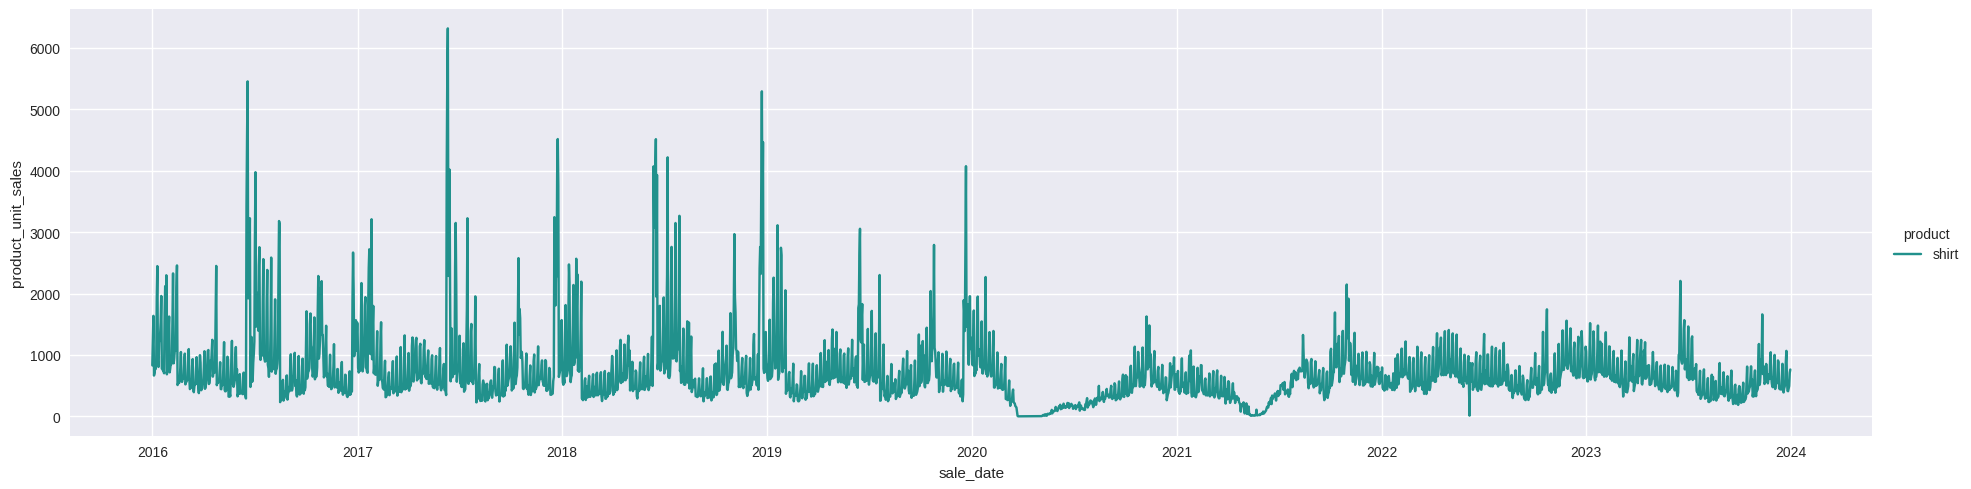

In [ ]:
#Plot of sales in all the years(2016-2024)

import matplotlib.pyplot as plt
top_8_years = sales['sale_date'].dt.year.value_counts().head(8)
sales_top_years_data = sales[sales['sale_date'].dt.year.isin(top_8_years.index)]
sns.relplot(data=sales_top_years_data,
            kind='line',
            x='sale_date',
            y='product_unit_sales',
            palette="viridis",
            hue = "product",
            aspect=19/5)
plt.show()

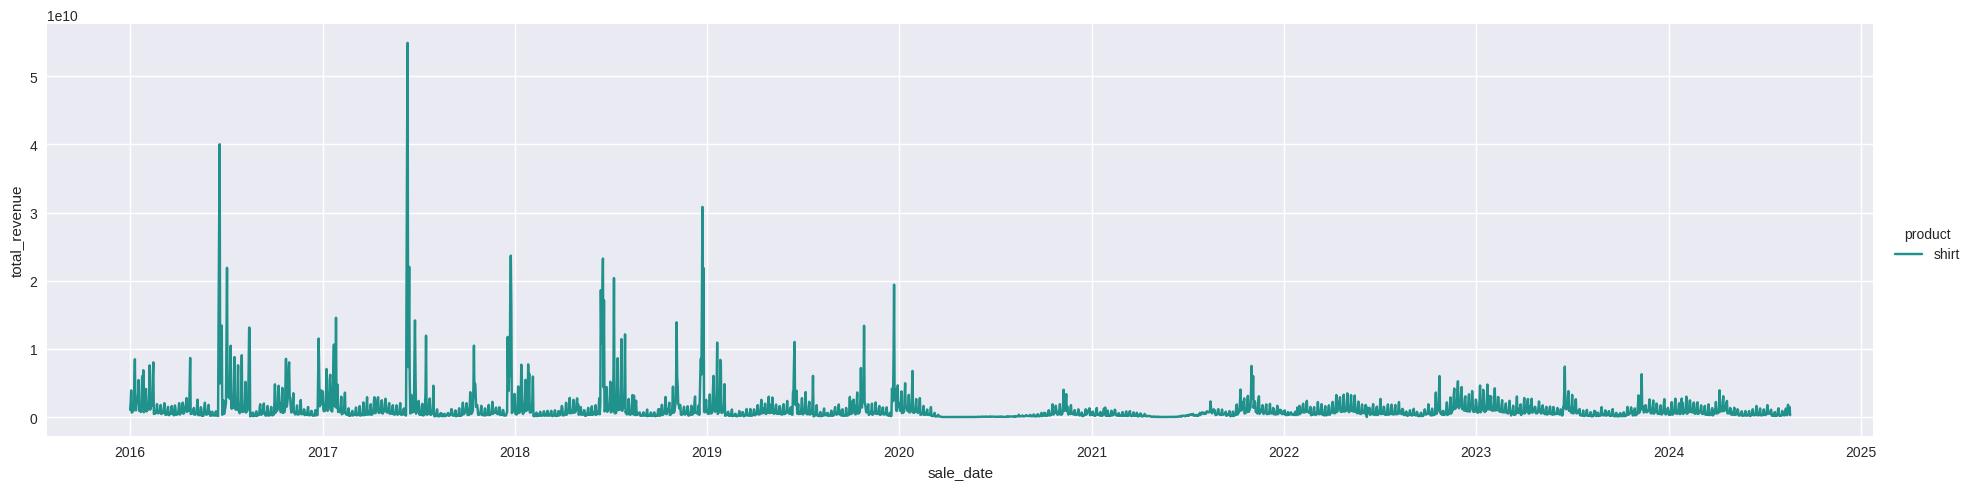

In [ ]:
#Plot of Total_Revenue in all the years(2016-2024)

import matplotlib.pyplot as plt
top_sales = sales['sale_date'].dt.year.value_counts()
sales_top_years_data = sales[sales['sale_date'].dt.year.isin(top_sales.index)]
sns.relplot(data=sales_top_years_data,
            kind='line',
            x='sale_date',
            y='total_revenue',
            palette="viridis",
            hue = "product",
            aspect=19/5)
plt.show()

***In both the graphs above, we see that there is a significant decrease in sales and revenue after 2020. So my assumption is that the corona outbreak may have effected the sales.***

Data preprocessing before fitting and forecasting

In [ ]:
# Group by year and sum the product unit sales
yearly_sales = sales.groupby(sales['sale_date'].dt.year)['product_unit_sales'].sum()

# Reset the index to convert Series to DataFrame
yearlysale = yearly_sales.reset_index()

# Rename the columns
yearlysale = yearlysale.rename(columns={'sale_date': 'ds', 'product_unit_sales': 'y'})

# Display the first few rows
yearlysale

,ds,y
0,2016,336955
1,2017,310557
2,2018,319559
3,2019,277193
4,2020,147819
5,2021,188996
6,2022,250505
7,2023,230842
8,2024,125472


Fitting the model and forecasting

In [ ]:
sales['sale_date'] = pd.to_datetime(sales['sale_date'], dayfirst=True)

# Rename columns for Prophet
sales = sales.rename(columns={'sale_date': 'ds', 'product_unit_sales': 'y'})
model_6 = Prophet()

# Fit the model with your historical data
model_6.fit(sales)
future_6 = model_6.make_future_dataframe(periods=6, freq='M')
forecast_6 = model_6.predict(future_6)

# Display the predictions for the next 6 months
forecast_next_6_months = forecast_6[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(6)
print(forecast_next_6_months)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6by11mks/dt_aq5qz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp6by11mks/t388ji6k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9416', 'data', 'file=/tmp/tmp6by11mks/dt_aq5qz.json', 'init=/tmp/tmp6by11mks/t388ji6k.json', 'output', 'file=/tmp/tmp6by11mks/prophet_modellpwl7gir/prophet_model-20240824121426.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:14:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:14:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


             ds        yhat  yhat_lower   yhat_upper
3112 2024-08-31  557.191889  -24.330796  1107.144703
3113 2024-09-30  215.185219 -336.162433   750.799244
3114 2024-10-31  507.808288  -16.630191  1035.584845
3115 2024-11-30  557.092699   26.396611  1107.583792
3116 2024-12-31  593.616731   60.961715  1167.177079
3117 2025-01-31  591.615731   83.297813  1131.491189


Above, we can find the sales forecast for the next 6 months

In [ ]:
forecast_6

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-01-01,943.650162,591.863787,1681.684858,943.650162,943.650162,206.198014,206.198014,206.198014,-88.846738,-88.846738,-88.846738,295.044752,295.044752,295.044752,0.0,0.0,0.0,1149.848176
1,2016-01-02,943.510734,952.122576,2014.891756,943.510734,943.510734,513.495505,513.495505,513.495505,234.884360,234.884360,234.884360,278.611144,278.611144,278.611144,0.0,0.0,0.0,1457.006239
2,2016-01-03,943.371306,1117.439392,2177.289963,943.371306,943.371306,700.974180,700.974180,700.974180,438.750039,438.750039,438.750039,262.224141,262.224141,262.224141,0.0,0.0,0.0,1644.345486
3,2016-01-04,943.231878,515.006671,1552.207806,943.231878,943.231878,88.806508,88.806508,88.806508,-157.537333,-157.537333,-157.537333,246.343841,246.343841,246.343841,0.0,0.0,0.0,1032.038386
4,2016-01-05,943.092450,463.165651,1558.864028,943.092450,943.092450,73.515976,73.515976,73.515976,-157.883203,-157.883203,-157.883203,231.399179,231.399179,231.399179,0.0,0.0,0.0,1016.608426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3113,2024-09-30,482.461085,-336.162433,750.799244,480.188364,484.729371,-267.275866,-267.275866,-267.275866,-157.537333,-157.537333,-157.537333,-109.738533,-109.738533,-109.738533,0.0,0.0,0.0,215.185219
3114,2024-10-31,472.330272,-16.630191,1035.584845,466.250172,478.295213,35.478017,35.478017,35.478017,-131.951556,-131.951556,-131.951556,167.429573,167.429573,167.429573,0.0,0.0,0.0,507.808288
3115,2024-11-30,462.526259,26.396611,1107.583792,451.713020,473.493348,94.566440,94.566440,94.566440,234.884360,234.884360,234.884360,-140.317921,-140.317921,-140.317921,0.0,0.0,0.0,557.092699
3116,2024-12-31,452.395445,60.961715,1167.177079,436.253995,469.990258,141.221286,141.221286,141.221286,-157.883203,-157.883203,-157.883203,299.104489,299.104489,299.104489,0.0,0.0,0.0,593.616731


In [ ]:
#finding the yhat value and also the trends, weekly, yearly
forecast_result =forecast_6['yhat']
forecast_add_components =forecast_6['trend'] + forecast_6['weekly'] + forecast_6['yearly']

(forecast_result.round(10) == forecast_add_components.round(10)).all()

True

Plotting the Forecasted results of sales for the next 6 months

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



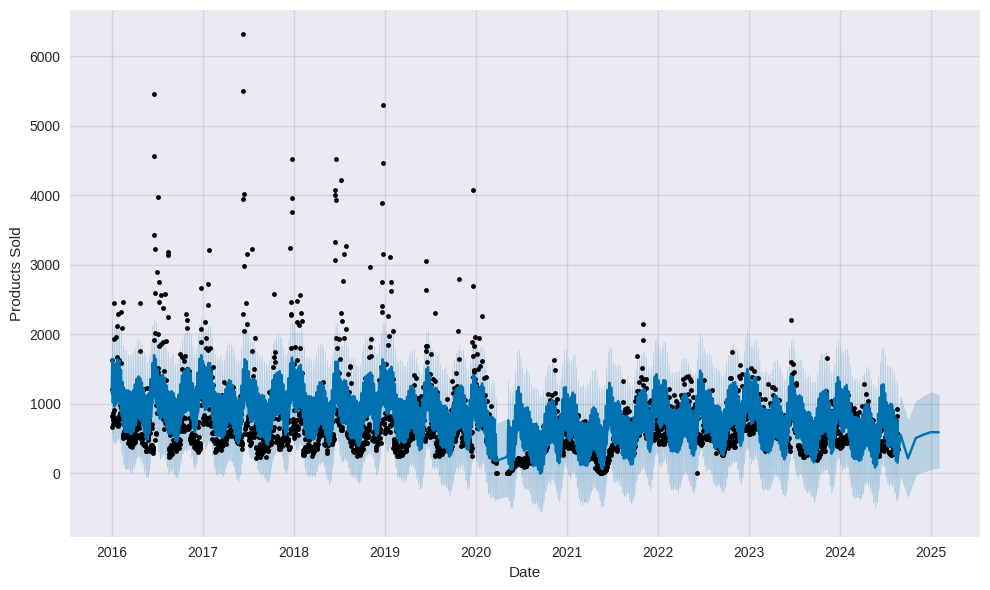

In [ ]:
fig = model_6.plot(forecast_6, xlabel='Date', ylabel='Products Sold')

# The black points in the plot shows the actual time series, and the blue line shows the fitted time series along with its forecasted values 6 months into the future.

Visualizing each of the trend and seasonality components

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:351: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:354: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



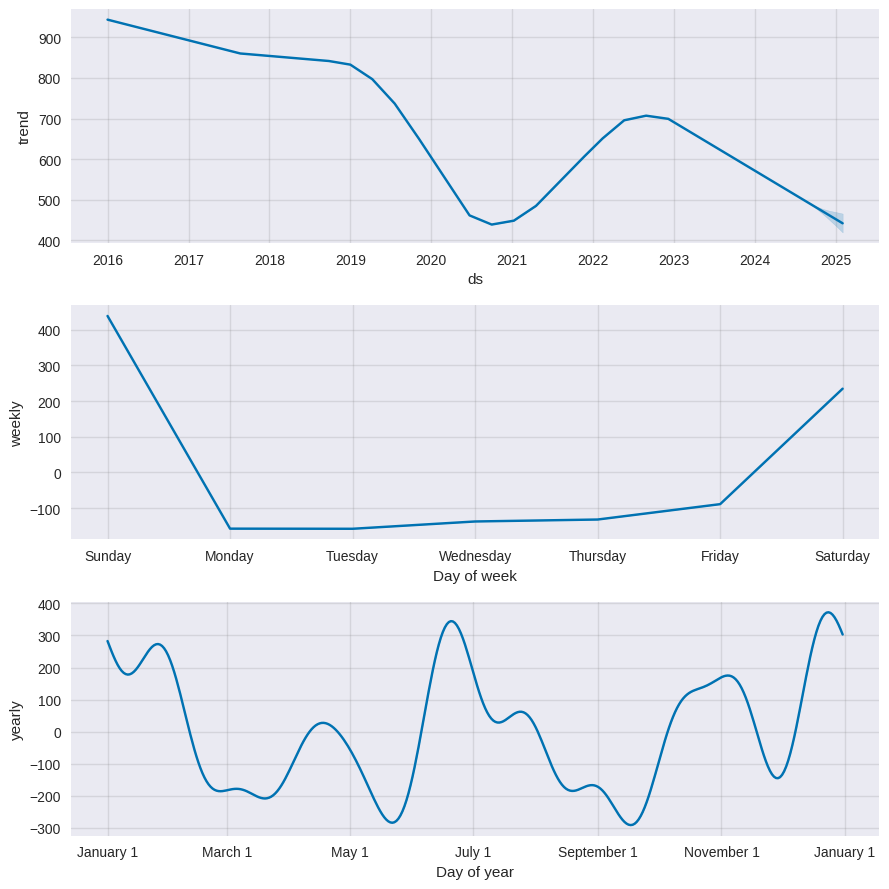

In [ ]:
fig = model_6.plot_components(forecast_6)

fig.show()

In [ ]:
plot_components_plotly(model_6, forecast_6)

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



Interactive visualization of the forecast and components

In [ ]:
fig =plot_plotly(model_6, forecast_6)
fig.update_layout(
    width=1200,   # Set the width of the figure in pixels
    height=800    # Set the height of the figure in pixels
)

# Show the updated figure
fig.show()